# WTA Match Predictor

### Contents

- Understanding the Problem Statement
- Data Collection
- Data Checks
- Exploratory Data Analysis
- Preprocessing
- Model Training
- Choose Best Model

### **Understanding the Problem Statement**

- This project seeks to determine what variables affect the outcome of a tennis match on the WTA tour.
- Additionally, this project seeks to train and test a model that can accurately predict the winner of a WTA match.

### **Data Collection**

* The data for this project comes from [Jeff Sackmann of Tennis Abstract.](https://github.com/JeffSackmann/tennis_wta)
* The data is presented such that each observation is a match played, and matches are grouped by year/season. Each observation includes information about each player and their performance in the match.
    - Key statistics include 1st serve percentage, break point conversions, aces/double faults, and more. 

We will be using several libraries to help us explore the data, including ``numpy``, ``pandas``, ``seaborn``, and ``matplotlib``.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Explore Head and Shape

In [3]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-609,Indian Wells,Hard,96,PM,20230306,286,214544,2.0,NaN,...,58.0,37.0,16.0,13.0,8.0,11.0,2,6100,16,2205
1,2023-609,Indian Wells,Hard,96,PM,20230306,285,216347,1.0,NaN,...,55.0,30.0,4.0,10.0,3.0,8.0,1,10585,36,1303
2,2023-609,Indian Wells,Hard,96,PM,20230306,284,221054,NaN,NaN,...,52.0,37.0,10.0,12.0,5.0,8.0,77,784,13,2246
3,2023-609,Indian Wells,Hard,96,PM,20230306,283,201514,NaN,NaN,...,24.0,14.0,12.0,8.0,0.0,5.0,83,743,43,1200
4,2023-609,Indian Wells,Hard,96,PM,20230306,282,201614,5.0,NaN,...,50.0,34.0,21.0,14.0,1.0,4.0,5,4905,49,1080


#### Dataset Shape

In [4]:
df.shape

(113, 49)

This CSV stud, which is a sample of the larger dataset, includes 113 observations and 49 features.

### Dataset Information

- Tourney Information: tourney_id, tourney_name, surface, draw_size, etc.
- Match Information: match_num, winner_id, loser_id, etc.
- Match Statistics: w_1stIn, w_1stWon, w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, etc.
    - Includes the same statistics for winner/loser

### **Data Checks**
Before working with the data, we must check and address the following:
- Missing values
- Duplicates
- Data types
- Unique values
- Statistics
- Categories

#### Check Missing Values

In [5]:
df.isna().sum()

tourney_id             0
tourney_name           0
surface                0
draw_size              0
tourney_level          0
tourney_date           0
match_num              0
winner_id              0
winner_seed           48
winner_entry          99
winner_name            0
winner_hand            0
winner_ht             30
winner_ioc             0
winner_age             0
loser_id               0
loser_seed            77
loser_entry           81
loser_name             0
loser_hand             0
loser_ht              36
loser_ioc              0
loser_age              0
score                  0
best_of                0
round                  0
minutes                0
w_ace                  1
w_df                   1
w_svpt                 1
w_1stIn                1
w_1stWon               1
w_2ndWon               1
w_SvGms                1
w_bpSaved              1
w_bpFaced              1
l_ace                  1
l_df                   1
l_svpt                 1
l_1stIn                1


#### Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set.

#### Check Data Types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          113 non-null    object 
 1   tourney_name        113 non-null    object 
 2   surface             113 non-null    object 
 3   draw_size           113 non-null    int64  
 4   tourney_level       113 non-null    object 
 5   tourney_date        113 non-null    int64  
 6   match_num           113 non-null    int64  
 7   winner_id           113 non-null    int64  
 8   winner_seed         65 non-null     float64
 9   winner_entry        14 non-null     object 
 10  winner_name         113 non-null    object 
 11  winner_hand         113 non-null    object 
 12  winner_ht           83 non-null     float64
 13  winner_ioc          113 non-null    object 
 14  winner_age          113 non-null    float64
 15  loser_id            113 non-null    int64  
 16  loser_se

#### Check Count of Unique Values

In [8]:
df.nunique()

tourney_id              7
tourney_name            7
surface                 3
draw_size               3
tourney_level           3
tourney_date            5
match_num              38
winner_id              61
winner_seed            18
winner_entry            3
winner_name            61
winner_hand             3
winner_ht              22
winner_ioc             28
winner_age             55
loser_id               96
loser_seed             20
loser_entry             3
loser_name             96
loser_hand              3
loser_ht               22
loser_ioc              36
loser_age              78
score                  77
best_of                 1
round                   6
minutes                70
w_ace                  14
w_df                   14
w_svpt                 62
w_1stIn                48
w_1stWon               35
w_2ndWon               24
w_SvGms                13
w_bpSaved              15
w_bpFaced              18
l_ace                  10
l_df                   15
l_svpt      

#### Check Statistics of Dataset

In [9]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,113.000000,1.130000e+02,113.000000,113.000000,65.000000,83.000000,113.000000,113.000000,36.000000,77.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,113.000000,113.000000,113.000000,113.000000
mean,50.123894,2.023046e+07,284.185841,210496.292035,6.230769,174.626506,26.423894,210621.433628,9.666667,173.636364,...,43.991071,25.866071,10.839286,10.392857,4.642857,9.205357,93.787611,1665.982301,126.194690,1033.424779
std,24.518627,1.139821e+02,9.897284,7052.453367,5.981140,5.547381,4.086110,6756.064422,8.691539,6.290990,...,15.723681,10.907057,5.260003,2.819997,2.995062,3.678862,138.021120,1720.814072,148.874339,1007.017900
min,32.000000,2.023031e+07,263.000000,201458.000000,1.000000,160.000000,17.900000,200748.000000,1.000000,160.000000,...,15.000000,5.000000,0.000000,5.000000,0.000000,3.000000,1.000000,26.000000,3.000000,11.000000
25%,32.000000,2.023040e+07,277.000000,203475.000000,2.000000,170.500000,23.700000,203500.000000,3.750000,170.000000,...,31.750000,16.750000,7.000000,8.000000,2.000000,7.000000,15.000000,563.000000,37.000000,429.000000
50%,32.000000,2.023040e+07,284.000000,211651.000000,4.000000,175.000000,26.100000,211702.000000,6.500000,175.000000,...,40.500000,25.000000,10.000000,10.000000,4.000000,9.000000,66.000000,851.000000,103.000000,630.000000
75%,64.000000,2.023061e+07,293.000000,214954.000000,7.000000,178.000000,28.600000,214939.000000,13.500000,178.000000,...,54.250000,33.250000,14.000000,12.000000,6.000000,11.000000,116.000000,2296.000000,154.000000,1258.000000
max,96.000000,2.023062e+07,300.000000,232447.000000,29.000000,185.000000,35.600000,232447.000000,32.000000,185.000000,...,85.000000,59.000000,26.000000,18.000000,16.000000,24.000000,817.000000,10585.000000,1077.000000,5605.000000


### **Exploratory Data Analysis**

In [10]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-609,Indian Wells,Hard,96,PM,20230306,286,214544,2.0,NaN,...,58.0,37.0,16.0,13.0,8.0,11.0,2,6100,16,2205
1,2023-609,Indian Wells,Hard,96,PM,20230306,285,216347,1.0,NaN,...,55.0,30.0,4.0,10.0,3.0,8.0,1,10585,36,1303
2,2023-609,Indian Wells,Hard,96,PM,20230306,284,221054,NaN,NaN,...,52.0,37.0,10.0,12.0,5.0,8.0,77,784,13,2246
3,2023-609,Indian Wells,Hard,96,PM,20230306,283,201514,NaN,NaN,...,24.0,14.0,12.0,8.0,0.0,5.0,83,743,43,1200
4,2023-609,Indian Wells,Hard,96,PM,20230306,282,201614,5.0,NaN,...,50.0,34.0,21.0,14.0,1.0,4.0,5,4905,49,1080


#### Explore (some) Categories

In [11]:
print("Categories in the 'tourney_name' variable:  ", end=" ")
print(df['tourney_name'].unique())

print("Categories in the 'surface' variable:       ", end=" ")
print(df['surface'].unique())

print("Categories in the 'draw_size' variable:       ", end=" ")
print(df['draw_size'].unique())

print("Categories in the 'tourney_level' variable:     ", end=" ")
print(df['tourney_level'].unique())

Categories in the 'tourney_name' variable:   ['Indian Wells' 'Miami' 'Bogota' 'Charleston' 'Nottingham'
 's Hertogenbosch' 'Berlin']
Categories in the 'surface' variable:        ['Hard' 'Clay' 'Grass']
Categories in the 'draw_size' variable:        [96 32 64]
Categories in the 'tourney_level' variable:      ['PM' 'I' 'P']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 35 numerical features : ['draw_size', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_ht', 'winner_age', 'loser_id', 'loser_seed', 'loser_ht', 'loser_age', 'best_of', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']

We have 14 categorical features : ['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ioc', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ioc', 'score', 'round']


#### Adding columns: 'Winner Break Points Conversion' and 'Loser Break Points Conversion'

- Break point conversion is a critical statistic in determining who has the advantage in a tennis match.
- The winner's break point conversion is determined by: ``(l_bpFaced - l_bpSaved) / l_bpFaced``.
    - This is because the winner created ``l_bpFaced`` break points and did not convert ``l_bpSaved`` break points.
- Similarly, the loser's break point conversion is determined by: ``(w_bpFaced - w_bpSaved) / w_bpFaced``.

In [13]:
# Define w_bpConversion
df['w_bpConversion'] = (df['l_bpFaced'] - df['l_bpSaved']) / df['l_bpFaced']
# Define l_bpConversion
df['l_bpConversion'] = (df['w_bpFaced'] - df['w_bpSaved']) / df['w_bpFaced']

In [14]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_bpConversion,l_bpConversion
0,2023-609,Indian Wells,Hard,96,PM,20230306,286,214544,2.0,NaN,...,16.0,13.0,8.0,11.0,2,6100,16,2205,0.272727,0.75
1,2023-609,Indian Wells,Hard,96,PM,20230306,285,216347,1.0,NaN,...,4.0,10.0,3.0,8.0,1,10585,36,1303,0.625000,0.50
2,2023-609,Indian Wells,Hard,96,PM,20230306,284,221054,NaN,NaN,...,10.0,12.0,5.0,8.0,77,784,13,2246,0.375000,0.40
3,2023-609,Indian Wells,Hard,96,PM,20230306,283,201514,NaN,NaN,...,12.0,8.0,0.0,5.0,83,743,43,1200,1.000000,1.00
4,2023-609,Indian Wells,Hard,96,PM,20230306,282,201614,5.0,NaN,...,21.0,14.0,1.0,4.0,5,4905,49,1080,0.750000,0.00


In several matches, the winner ultimately had a lower break point conversion than the loser. This is common; in many matches, the winner creates many break point chances and converts few of them, while the loser creates only a few break point chances and converts most of them. For this reason, it will be important to also consider the number of break points faced and saved by the winner and loser.

### Data Visualizations

It would make sense for the winner of a match to statistically perform better than the loser. We will visualize some comparisons of winner and loser features to get a rough idea of how much these stats may play a role in determining the match outcome.

#### Separate Winner and Loser Features

In [15]:
# Get winner variables
w_stats = df.loc[:, ['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpFaced', 'w_bpSaved', 'winner_age', 'winner_ht', 'w_bpConversion']]
# Get loser variables
l_stats = df.loc[:, ['l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpFaced', 'l_bpSaved', 'loser_age', 'loser_ht', 'l_bpConversion']]

In [16]:
w_stats.head()

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpFaced,w_bpSaved,winner_age,winner_ht,w_bpConversion
0,11.0,4.0,84.0,53.0,39.0,12.0,14.0,4.0,1.0,24.8,182.0,0.272727
1,1.0,0.0,73.0,50.0,31.0,10.0,11.0,8.0,4.0,21.7,176.0,0.625000
2,2.0,4.0,83.0,55.0,38.0,14.0,13.0,5.0,3.0,20.3,175.0,0.375000
3,4.0,0.0,44.0,22.0,19.0,12.0,8.0,1.0,0.0,32.9,176.0,1.000000
4,11.0,3.0,93.0,49.0,42.0,26.0,15.0,2.0,2.0,29.3,177.0,0.750000


In [17]:
l_stats.head()

,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpFaced,l_bpSaved,loser_age,loser_ht,l_bpConversion
0,3.0,6.0,88.0,58.0,37.0,16.0,13.0,11.0,8.0,27.2,178.0,0.75
1,1.0,2.0,72.0,55.0,30.0,4.0,10.0,8.0,3.0,22.7,170.0,0.50
2,4.0,4.0,76.0,52.0,37.0,10.0,12.0,8.0,5.0,26.7,185.0,0.40
3,3.0,5.0,55.0,24.0,14.0,12.0,8.0,5.0,0.0,28.2,175.0,1.00
4,5.0,8.0,91.0,50.0,34.0,21.0,14.0,4.0,1.0,20.4,168.0,0.00


#### 1. Compare Aces and Double Faults

Text(0.5, 1.0, 'Distribution of Aces for Losers')

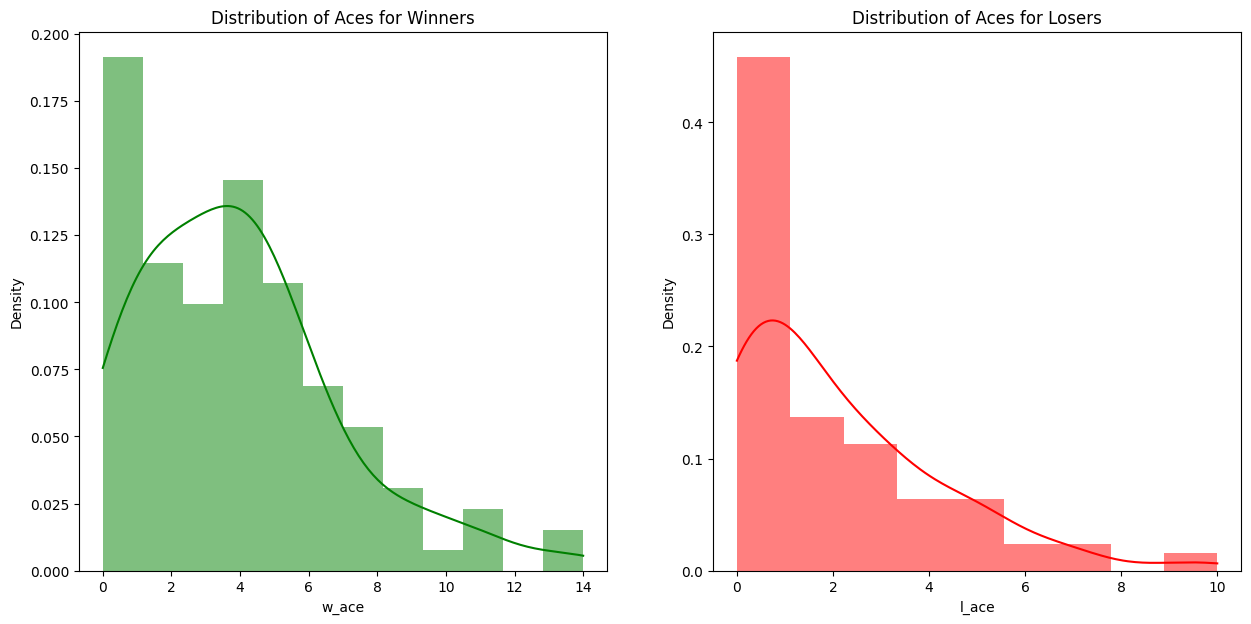

In [18]:
# Plot winner and loser aces in a histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['w_ace'], color='green', label='Winner Aces', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Aces for Winners')

plt.subplot(122)
sns.histplot(l_stats['l_ace'], color='red', label='Loser Aces', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Aces for Losers')

Notes:
- Close to 60% of losers served between 0 and 2 aces in the match, and none served more than 10.
- Among winners, only around 30% served between 0 and 2 aces. Some players served more than 10 aces.
- Overall, winners appear to consistently serve more aces than losers, indicating that this is statistically significant.

Text(0.5, 1.0, 'Distribution of Double Faults for Losers')

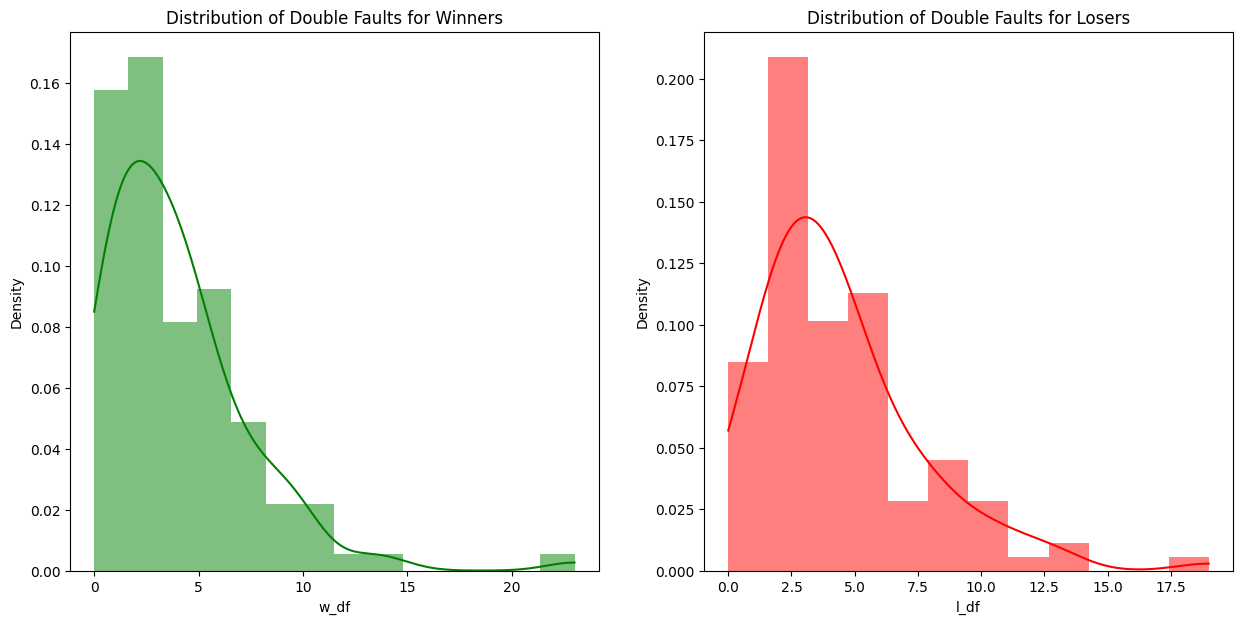

In [19]:
# Plot winner and loser double faults in a histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['w_df'], color='green', label='Winner Double Faults', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Double Faults for Winners')

plt.subplot(122)
sns.histplot(l_stats['l_df'], color='red', label='Loser Double Faults', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Double Faults for Losers')

Notes:
- Over 20% of losers served 2 or 3 double faults, but the majority served less than 7.
- Around 40% of winners served between 0 and 5 double faults, indicating good consistency.
    - In the outlier case, a player managed to win despite serving 23 double faults (and 0 aces): Carol Zhao at the 2023 Bogota Open.
    - In that match, Zhao's opponent, Maria Lourdes Carle, served 13 double faults and 0 aces.
- In general, losers only serve double faults slightly more often than winners, indicating little statistical significance.

#### 2. Comparing Break Points Faced/Saved and Break Point Conversion

As stated earlier, break point conversion seems to be a misleading statistic, as winners may convert few break points out of many chances, leading to a considerably lower break point conversion percentage than their opponents. As a result, we should visualize how break points faced and saved may impact our model compared to break point conversion.

Text(0.5, 1.0, 'Distribution of Break Points Faced by Losers')

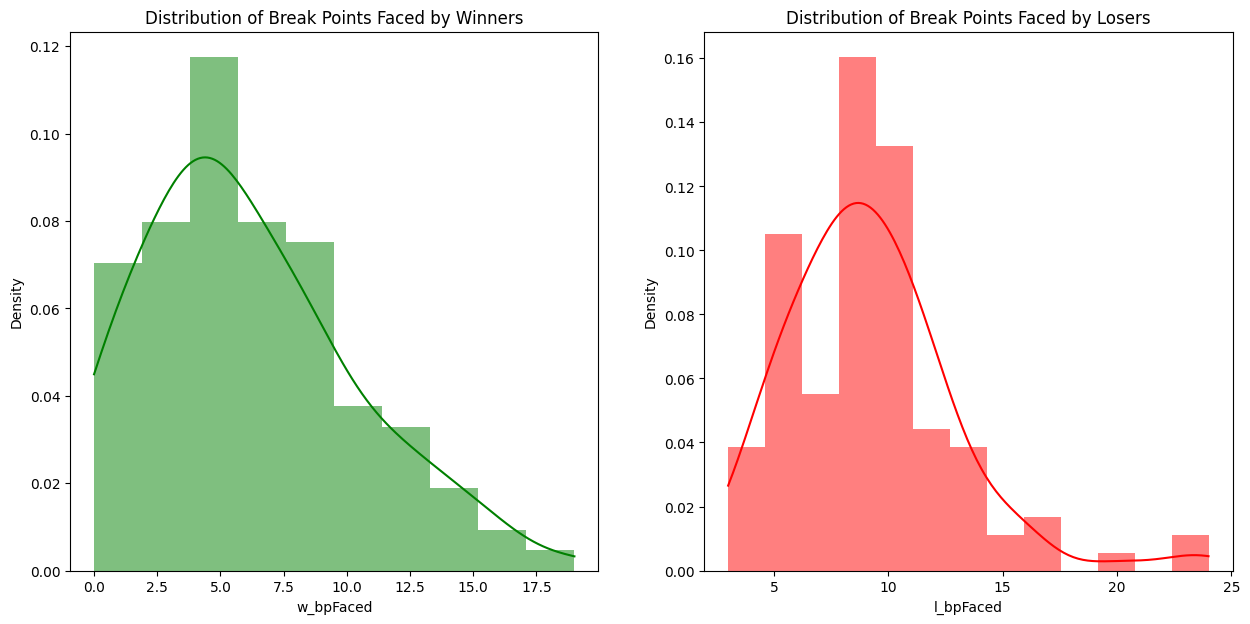

In [20]:
# Visualize the distribution of break points faced for winners and losers
# We expect winners to face fewer break points than losers, since they should hold serve with more dominance.
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['w_bpFaced'], color='green', label='Winner BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Points Faced by Winners')

plt.subplot(122)
sns.histplot(l_stats['l_bpFaced'], color='red', label='Loser BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Points Faced by Losers')

Notes:
- Over 40% of winners faced less than 10 break points on serve.
- On the other hand, about 45% of losers faced between 5 and 10 break points on serve
- This difference indicates that losers are likely to face significantly more break points than winners.

Text(0.5, 1.0, 'Distribution of Break Points Saved by Losers')

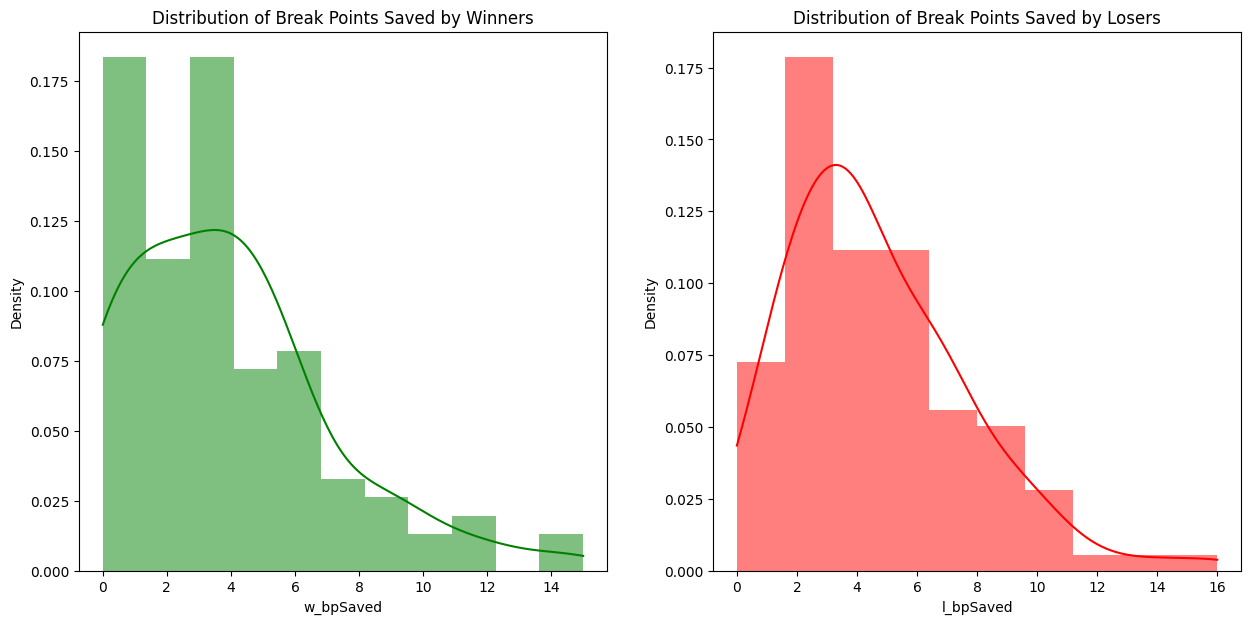

In [21]:
# Visualize the distribution of break points saved for winners and losers
# We could expect winners to save more break points than losers, but they may also save fewer due to facing fewer BPs.
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['w_bpSaved'], color='green', label='Winner BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Points Saved by Winners')

plt.subplot(122)
sns.histplot(l_stats['l_bpSaved'], color='red', label='Loser BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Points Saved by Losers')

Notes:
- Most winners saved between 0 and 4 break points, with diminishing numbers beyond this range.
- Similarly, most losers saved between 2 and 6 break points. Only around 7.5% saved 0 break points.
- Overall, this distribution indicates that break points saved is not a very good indicator of match winners.

Text(0.5, 1.0, 'Distribution of Break Point Conversion by Losers')

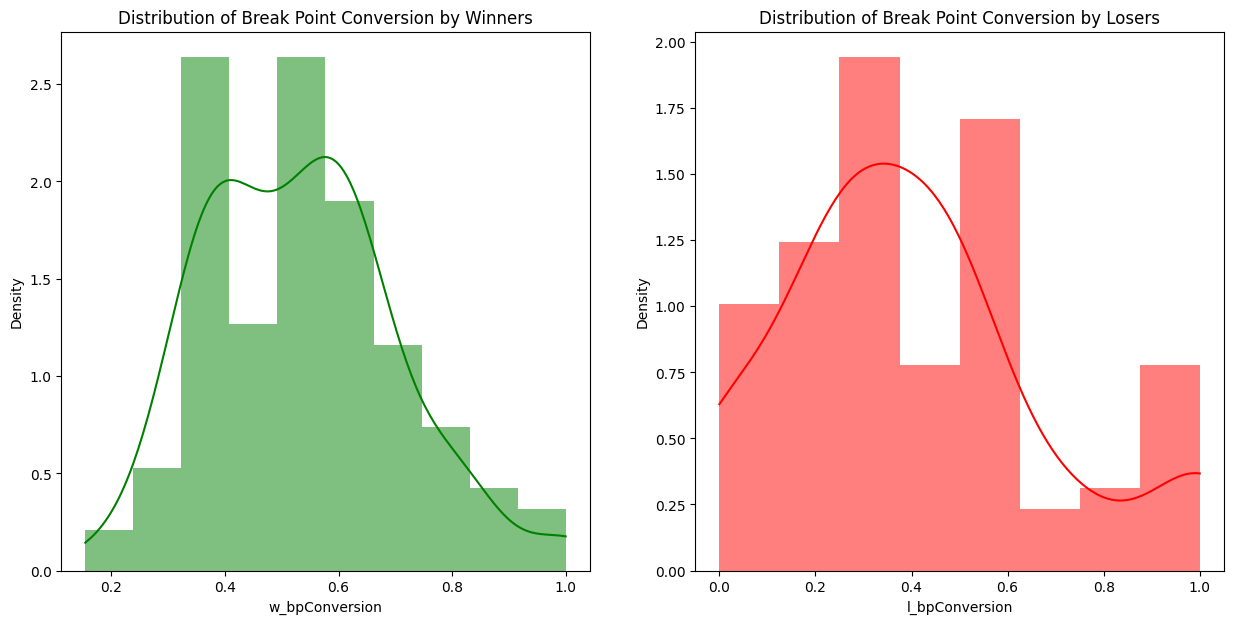

In [22]:
# Visualize distribution of break point conversion for winners and losers
# We would expect winners to have a higher break point conversion rate than losers
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['w_bpConversion'], color='green', label='Winner BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Point Conversion by Winners')

plt.subplot(122)
sns.histplot(l_stats['l_bpConversion'], color='red', label='Loser BP Faced', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Break Point Conversion by Losers')

Notes:
- Winner break point conversion peaks around 50%, with most winners converting between 40% and 60% of break points.
- Loser break point conversion peaks around 30%, although a significant amount converted 60% and even 100%.
- Overall, this distribution indicates that break point conversion is not a very good determinant of who wins a tennis match. This is likely due to the fact that winners often have significantly more break point chances than losers.

#### 3. Comparing Ages of Winners and Losers

Another interesting angle for predicting tennis matches could be age. In modern women's tennis (over the last 15-20 years), players have seen their most successful seasons roughly between the ages of 22 and 27. As a result, we could expect that match winners will often fall in this range, while losers will be more likely to be younger or older.

Text(0.5, 1.0, 'Distribution of Age for Losers')

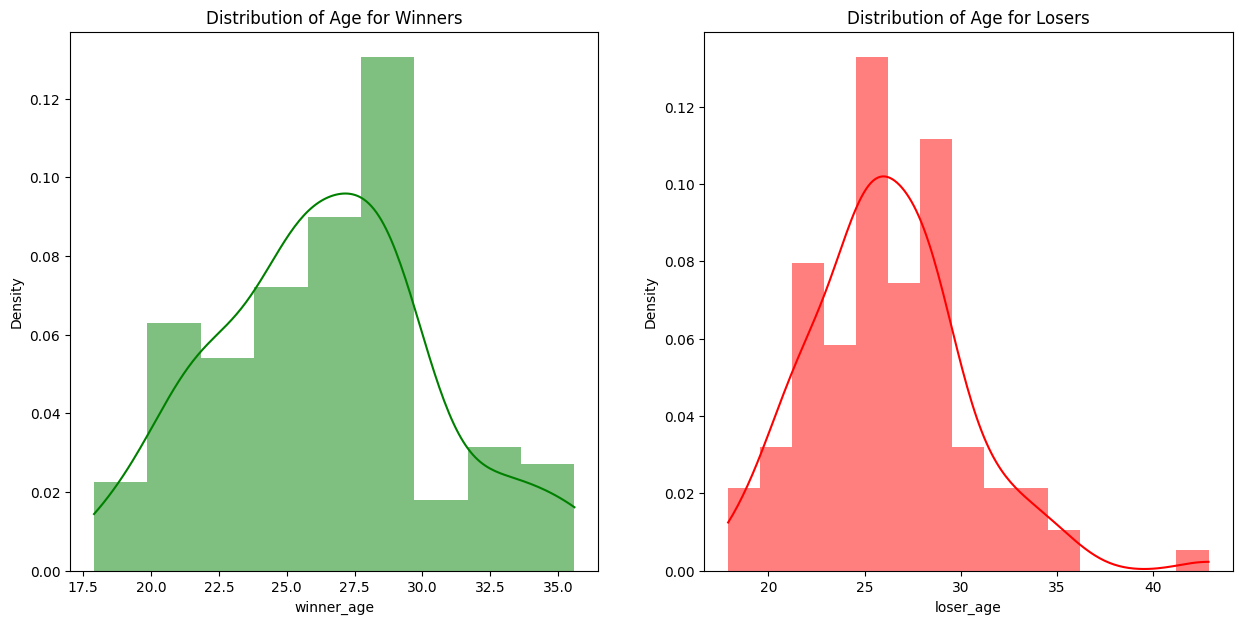

In [30]:
# Visualize distribution of age for winners and losers 
# We would expect winners to have a higher break point conversion rate than losers
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(w_stats['winner_age'], color='green', label='Winner Age', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Age for Winners')

plt.subplot(122)
sns.histplot(l_stats['loser_age'], color='red', label='Loser Age', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Age for Losers')

Notes:
- As expected, winners were most often around 28 years old, lending credence to our range. Additionally the fewest number of winners were under 22 and over 30.
- Losers were mostly between the ages of 23 and 29. Similar to winners, few losers were under 22 or over 30.
- Overall, this distribution indicates that age is not a very good predictor of who wins a tennis match. This is likely due to the fact that most tennis players on tour in general are between 23 and 29, so most winners and losers will likely fall in this range.

### **Preprocessing**

asdf

### **Model Training**

asdf

### **Choose Best Model**

asdf